In [90]:
import numpy as np # Linear Algebra
import matplotlib.pyplot as plt # Plotting
from mpl_toolkits.mplot3d import Axes3D # For 3D plotting
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [91]:
#lecture code for rotation matrices 
def RotX(theta):
    ct = np.cos(theta)
    st = np.sin(theta)
    R = np.eye(3, 3)
    R[1, 1] = ct
    R[1, 2] = -st
    R[2, 1] = st
    R[2, 2] = ct
    return R

def RotY(theta):
    ct = np.cos(theta)
    st = np.sin(theta)
    R = np.eye(3, 3)
    R[0, 0] = ct
    R[0, 2] = st
    R[2, 0] = -st
    R[2, 2] = ct
    return R

def RotZ(theta):
    ct = np.cos(theta)
    st = np.sin(theta)
    R = np.eye(3, 3)
    R[0, 0] = ct
    R[0, 1] = -st
    R[1, 0] = st
    R[1, 1] = ct
    return R

def rot_inv(R):
    return R.T

In [92]:
def transform_point(pb, R, p = np.zeros((3, 1))):
    return p + R @ pb

def transform_vector(vb, R):
    return R @ vb

def homogeneous(R, p = np.zeros((3, 1))):
    T = np.eye(4)
    T[:3, :3] = R
    T[:3, 3:] = p

    return T

In [93]:
#plot frame based on transformation matrices
def plot_frame(ax, T,length=1.0):
    origin = T[:3, 3:]
    R = T[:3, :3]
    xaxis = R @ np.array([[1., 0., 0.]]).T
    yaxis = R @ np.array([[0., 1., 0.]]).T
    zaxis = R @ np.array([[0., 0., 1.]]).T

    ax.quiver(*origin, *xaxis, color='r', length=length)
    ax.quiver(*origin, *yaxis, color='g', length=length)
    ax.quiver(*origin, *zaxis, color='b', length=length)

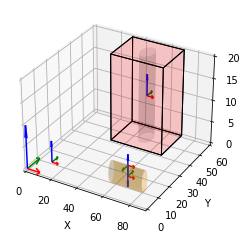

In [94]:
# Create a figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# box
length_cm = 40  # x
width_cm = 20   # y
height_cm = 20  # z

# Translation vector to move the box to (x=30, y=40) for its edge at (0, 0, 0)
box_translation = np.array([30, 40, 0])

# Define the vertices
vertices = np.array([[0, 0, 0],
                     [length_cm, 0, 0],
                     [length_cm, width_cm, 0],
                     [0, width_cm, 0],
                     [0, 0, height_cm],
                     [length_cm, 0, height_cm],
                     [length_cm, width_cm, height_cm],
                     [0, width_cm, height_cm]])

# Define the six faces (by connecting the vertices)
faces = [[vertices[0], vertices[1], vertices[2], vertices[3]],  # Bottom
         [vertices[4], vertices[5], vertices[6], vertices[7]],  # Top
         [vertices[0], vertices[1], vertices[5], vertices[4]],  # Front
         [vertices[2], vertices[3], vertices[7], vertices[6]],  # Back
         [vertices[1], vertices[2], vertices[6], vertices[5]],  # Right
         [vertices[0], vertices[3], vertices[7], vertices[4]]]  +box_translation# Left

# Create the box using Poly3DCollection with red color and semi-transparent surface
ax.add_collection3d(Poly3DCollection(faces, facecolors='r', linewidths=1, edgecolors='k', alpha=0.1))

# Create the cylinder (radius 5, height 40) in the center of the box
theta = np.linspace(0, 2 * np.pi, 100)
z_cylinder = np.linspace(0, height_cm, 100)
x_cylinder = 5 * np.cos(theta)
y_cylinder = 5 * np.sin(theta)

x_cylinder += 50
y_cylinder += 50

# Plot the cylinder in the box (this gives the effect of a hole)
ax.plot_surface(x_cylinder[None, :], y_cylinder[None, :], z_cylinder[:, None], color='0.1', alpha=0.1)


#horizontal cylinder
x_cylinder_horizontal = np.linspace(57, 82, 100)  # Extent of cylinder along X
y_cylinder_horizontal = 2.5 * np.sin(theta)
z_cylinder_horizontal = 2.5 * np.cos(theta) 
y_cylinder_horizontal+=9.5
z_cylinder_horizontal+=2.5
ax.plot_surface(x_cylinder_horizontal[:, None], y_cylinder_horizontal[None, :], #prosoxh sta none!
                z_cylinder_horizontal[None, :], color='orange', alpha=0.3)

# Set the limits and labels for the plot
ax.set_xlim([0, 90])
ax.set_ylim([0, 60])
ax.set_zlim([0, height_cm])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Let's create the world frame
plot_frame(ax, np.eye(4),length=10) #larger length to be visible

#Adding box body frame
pbox = np.array([[50., 50., 10.]]).T
R=RotX(0)@RotY(0)@RotZ(0)
Tbox=homogeneous(R,pbox)
plot_frame(ax, Tbox,length=5)#larger length to be visible

#Adding cylinder body frame
pcyl=np.array([[69.5, 9.5, 2.5]]).T
Tcyl=homogeneous(R,pcyl)
plot_frame(ax, Tcyl,length=5)#larger length to be visible

#Adding Franka Panda base frame and end effector frame
pbase=np.array([[10., 10., 0.]]).T
Tbase=homogeneous(R,pbase)
plot_frame(ax, Tbase,length=5)
#end effector
pend=np.array([[69.5, 9.5, 5.]]).T
Rend=RotX(np.pi)@RotY(0)@RotZ(0)
Tend=homogeneous(Rend,pend)
plot_frame(ax, Tend,length=5)

# Show the plot
plt.show()

In [95]:
print("box transformation matrix:")
print(Tbox)
print("horizontal cylinder transformation matrix")
print(Tcyl)

box transformation matrix:
[[ 1.  0.  0. 50.]
 [ 0.  1.  0. 50.]
 [ 0.  0.  1. 10.]
 [ 0.  0.  0.  1.]]
horizontal cylinder transformation matrix
[[ 1.   0.   0.  69.5]
 [ 0.   1.   0.   9.5]
 [ 0.   0.   1.   2.5]
 [ 0.   0.   0.   1. ]]


In [96]:
print("Franka Panda base frame transformation matrix:")
print(Tbase)

Franka Panda base frame transformation matrix:
[[ 1.  0.  0. 10.]
 [ 0.  1.  0. 10.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]


In [97]:
#cylinder to end-effector
pdif=np.array([[0., 0., 2.5]]).T
Rcyl_end=RotX(np.pi)@RotY(0)@RotZ(0)
Tcyl_end=homogeneous(Rcyl_end,pdif)
print(Tcyl_end)

[[ 1.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00 -1.0000000e+00 -1.2246468e-16  0.0000000e+00]
 [ 0.0000000e+00  1.2246468e-16 -1.0000000e+00  2.5000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+00]]


In [98]:
#5 recheck with lecture 4 pg 5 
print(rot_inv(R)@Rend)

[[ 1.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00 -1.0000000e+00 -1.2246468e-16]
 [ 0.0000000e+00  1.2246468e-16 -1.0000000e+00]]


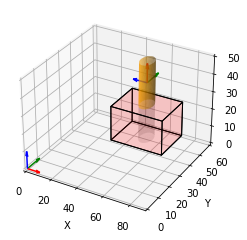

In [99]:
#6 release the cylinder on the box
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# box
length_cm = 40  # x
width_cm = 20   # y
height_cm = 20  # z

# Translation vector to move the box to (x=30, y=40) for its edge at (0, 0, 0)
box_translation = np.array([30, 40, 0])

# Define the vertices
vertices = np.array([[0, 0, 0],
                     [length_cm, 0, 0],
                     [length_cm, width_cm, 0],
                     [0, width_cm, 0],
                     [0, 0, height_cm],
                     [length_cm, 0, height_cm],
                     [length_cm, width_cm, height_cm],
                     [0, width_cm, height_cm]])

# Define the six faces (by connecting the vertices)
faces = [[vertices[0], vertices[1], vertices[2], vertices[3]],  # Bottom
         [vertices[4], vertices[5], vertices[6], vertices[7]],  # Top
         [vertices[0], vertices[1], vertices[5], vertices[4]],  # Front
         [vertices[2], vertices[3], vertices[7], vertices[6]],  # Back
         [vertices[1], vertices[2], vertices[6], vertices[5]],  # Right
         [vertices[0], vertices[3], vertices[7], vertices[4]]]  +box_translation# Left

# Create the box using Poly3DCollection with red color and semi-transparent surface
ax.add_collection3d(Poly3DCollection(faces, facecolors='r', linewidths=1, edgecolors='k', alpha=0.1))

# Create the cylinder (radius 5, height 40) in the center of the box
theta = np.linspace(0, 2 * np.pi, 100)
z_cylinder = np.linspace(0, height_cm, 100)
x_cylinder = 5 * np.cos(theta)
y_cylinder = 5 * np.sin(theta)

x_cylinder += 50
y_cylinder += 50

# Plot the cylinder in the box (this gives the effect of a hole)
ax.plot_surface(x_cylinder[None, :], y_cylinder[None, :], z_cylinder[:, None], color='0.1', alpha=0.1)

#cylinder orange
z_cylinder2 = np.linspace(20, 45, 100)
x_cylinder2 = 5 * np.cos(theta)
y_cylinder2 = 5 * np.sin(theta)
#translation
x_cylinder2 +=50
y_cylinder2 +=50
ax.plot_surface(x_cylinder2[None, :], y_cylinder2[None, :], z_cylinder2[:, None], color='orange', alpha=0.7)


# Set the limits and labels for the plot
ax.set_xlim([0, 90])
ax.set_ylim([0, 60])
ax.set_zlim([0, 50])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Let's create the world frame
plot_frame(ax, np.eye(4),length=10) #larger length to be visible
#transformation matrix
translation=np.array([[50.,50.,32.5]]).T
R6=RotY(-np.pi/2.)@RotX(0)@RotZ(0)
T6=homogeneous(R6,translation)
plot_frame(ax, T6,length=11)


plt.show()

In [100]:
print("world frame transformation matrix cylinder to box:")
print("T=",end='')
print(T6)

world frame transformation matrix cylinder to box:
T=[[ 6.123234e-17  0.000000e+00 -1.000000e+00  5.000000e+01]
 [ 0.000000e+00  1.000000e+00  0.000000e+00  5.000000e+01]
 [ 1.000000e+00  0.000000e+00  6.123234e-17  3.250000e+01]
 [ 0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00]]
